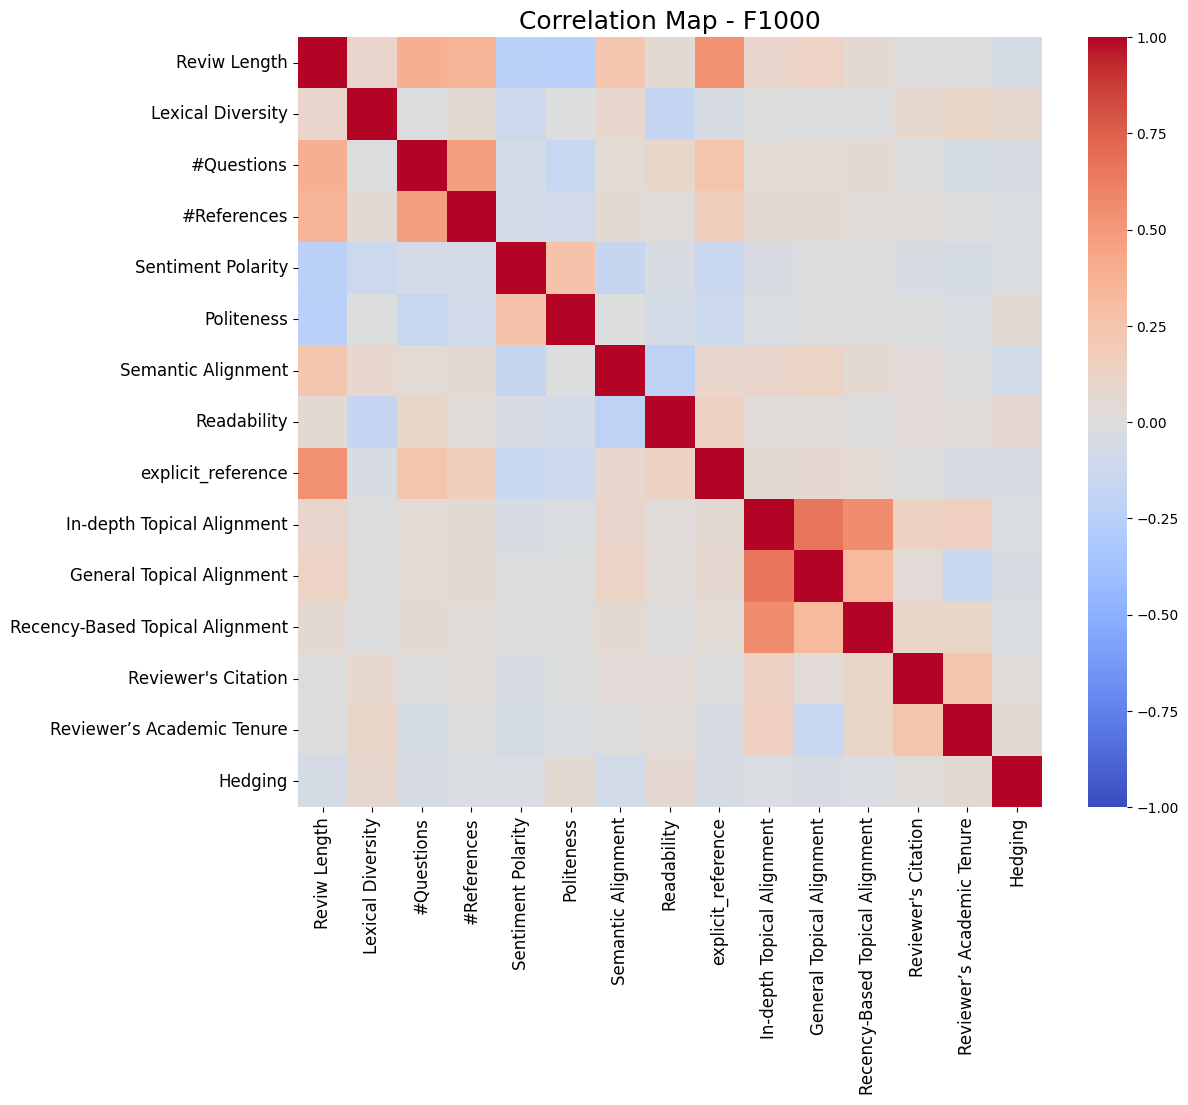

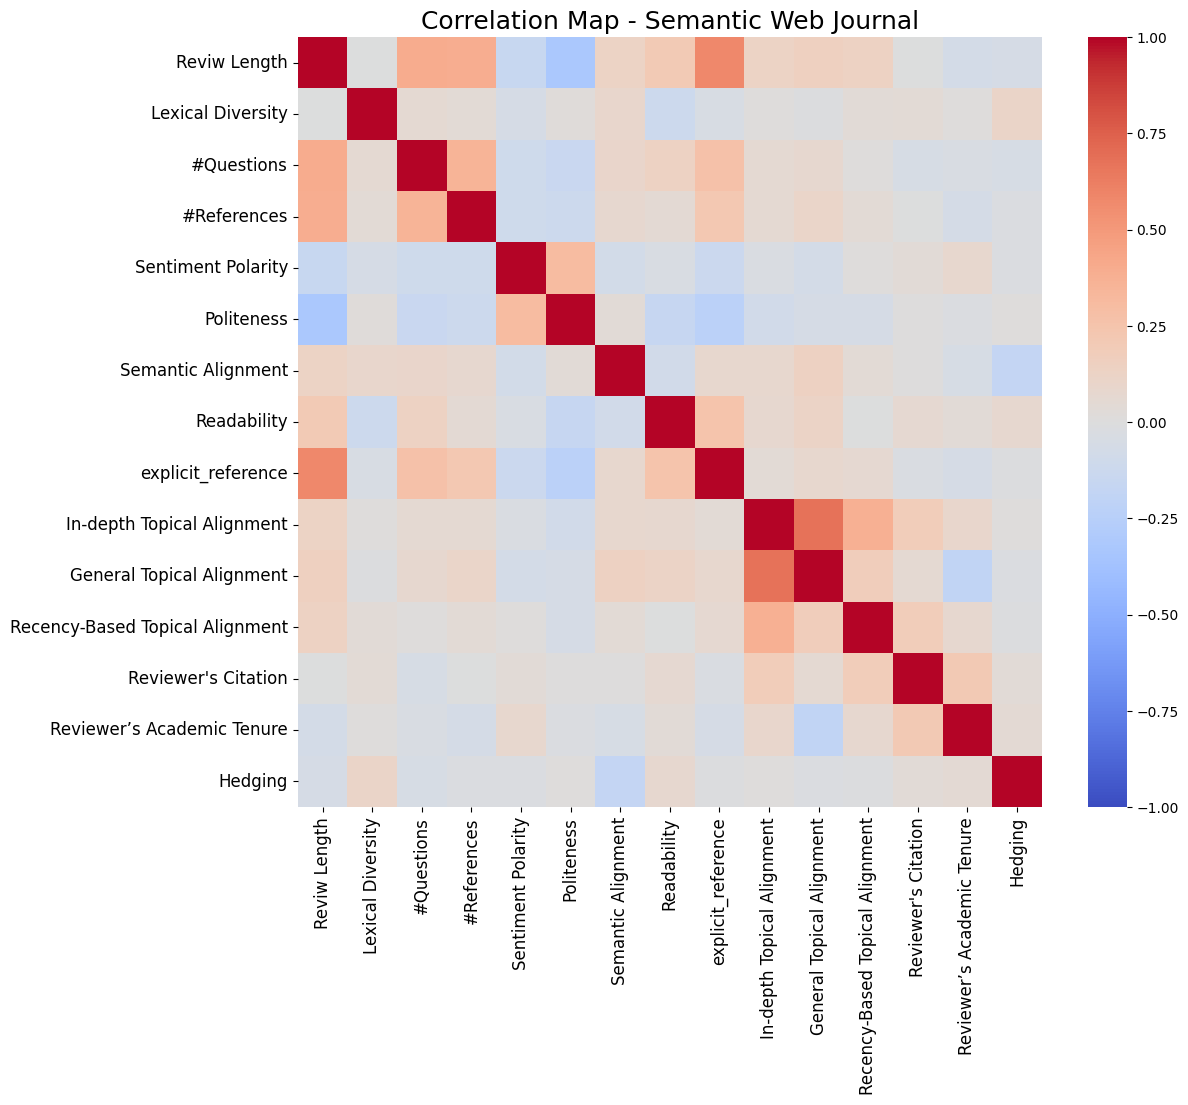

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



df_f1000 = pd.read_csv('f1000research.csv')
df_sw = pd.read_csv('semantic-web-journal-analysis.csv')


#drop columns starting with 'llm'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.startswith('llm')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.startswith('llm')]

#drop columns with names ends with '.1'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('.1')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('.1')]

#drop columns with names weight
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('weight')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('weight')]

###################
# create new column named hedge_score as follow: 1 - hedge_C / (hedge_E + hedge_D + hedge_C + hedge_N + hedge_I)
df_f1000['hedge_score'] = 1 - df_f1000['hedge_C'] / (df_f1000['hedge_E'] + df_f1000['hedge_D'] + df_f1000['hedge_C'] + df_f1000['hedge_N'] + df_f1000['hedge_I'])
df_sw['hedge_score'] = 1 - df_sw['hedge_C'] / (df_sw['hedge_E'] + df_sw['hedge_D'] + df_sw['hedge_C'] + df_sw['hedge_N'] + df_sw['hedge_I'])

# drop hedge_E, hedge_D, hedge_C, hedge_N, hedge_I
df_f1000 = df_f1000.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_sw = df_sw.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])

# drop flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
df_f1000 = df_f1000.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_sw = df_sw.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])

# rename flesch_reading_ease to readability_score
df_f1000 = df_f1000.rename(columns={'flesch_reading_ease': 'readability_score'})
df_sw = df_sw.rename(columns={'flesch_reading_ease': 'readability_score'})

#drop columns end with date and submission_number
df_f1000 = df_f1000.drop(columns=[col for col in df_f1000.columns if col.endswith('submit') or col.endswith('submission_number')])
df_sw = df_sw.drop(columns=[col for col in df_sw.columns if col.endswith('submit') or col.endswith('submission_number')])


# df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
# df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

df_f1000 = df_f1000.rename(columns={'length_words': 'Reviw Length', 'mattr': 'Lexical Diversity', 'question_count': '#Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure'})
df_sw = df_sw.rename(columns={'length_words': 'Reviw Length', 'mattr': 'Lexical Diversity', 'question_count': '#Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure'})


'''
max_similarity --> In-depth Topical Alignment
avg_similarity --> General Topical Alignment
avg_recent_similarity --> Recency-Based Topical Alignment
reviewer_citations --> Reviewer's Citation
reviewer_experience_years --> Reviewer’s Academic Tenure
'''

# Function to plot correlation map
def plot_correlation_map(df, title):
    numerical_columns = df.select_dtypes(include=['float64', 'int64'])
    correlation_matrix = numerical_columns.corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar=True, vmax=1, vmin=-1, center=0)
    plt.title(title, fontsize=18)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Plot correlation maps for each dataframe
plot_correlation_map(df_f1000, 'Correlation Map - F1000')
plot_correlation_map(df_sw, 'Correlation Map - Semantic Web Journal')

/tmp/ipykernel_1352378/3375838116.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


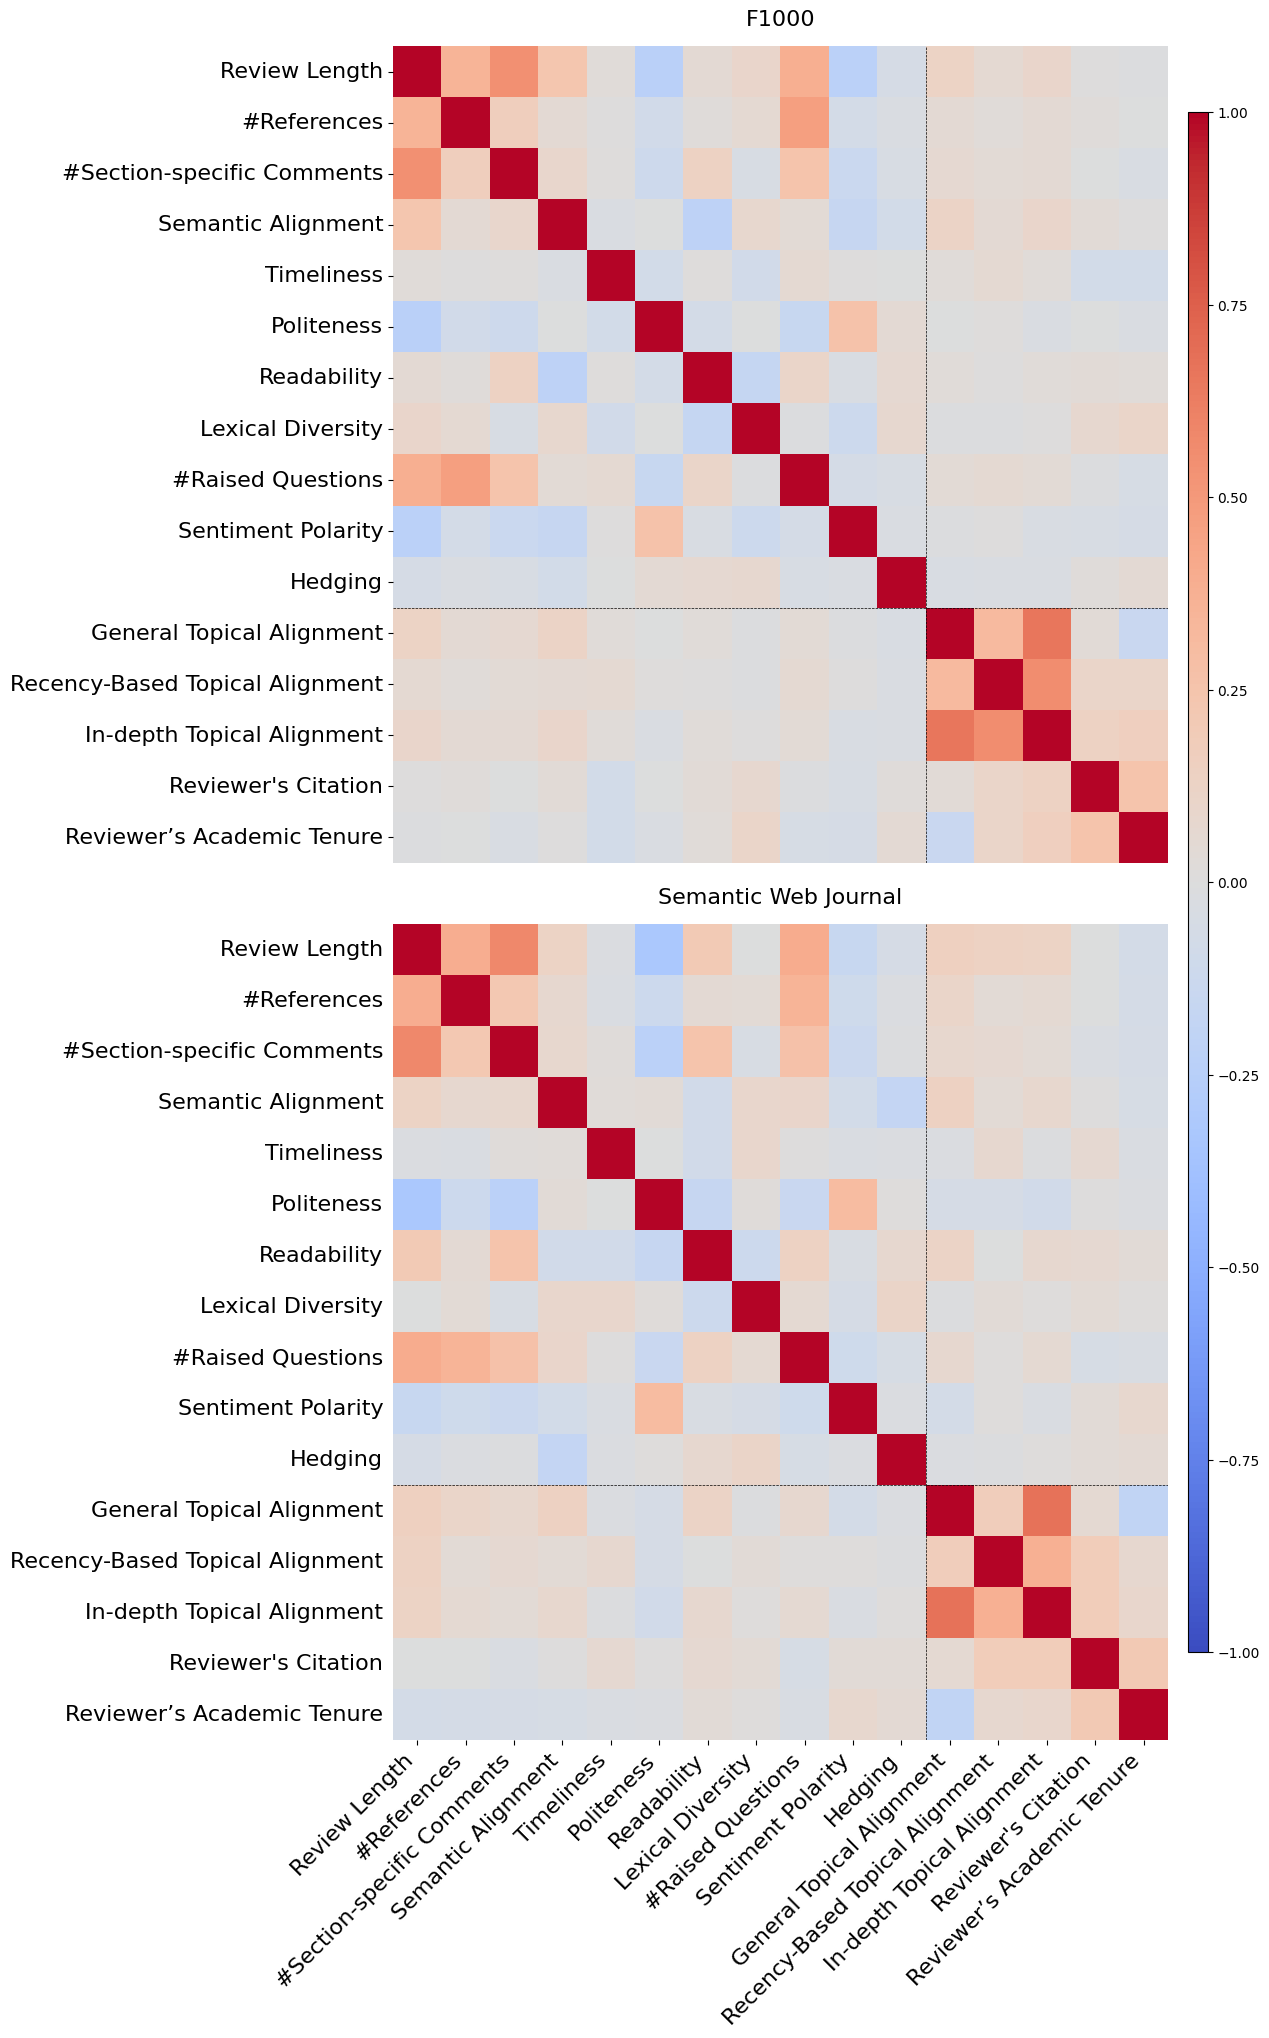

In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt



df_f1000 = pd.read_csv('f1000research.csv')
df_sw = pd.read_csv('semantic-web-journal-analysis.csv')


#drop columns starting with 'llm'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.startswith('llm')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.startswith('llm')]

#drop columns with names ends with '.1'
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('.1')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('.1')]

#drop columns with names weight
df_f1000 = df_f1000.loc[:, ~df_f1000.columns.str.endswith('weight')]
df_sw = df_sw.loc[:, ~df_sw.columns.str.endswith('weight')]

###################
# create new column named hedge_score as follow: 1 - hedge_C / (hedge_E + hedge_D + hedge_C + hedge_N + hedge_I)
df_f1000['hedge_score'] = 1 - df_f1000['hedge_C'] / (df_f1000['hedge_E'] + df_f1000['hedge_D'] + df_f1000['hedge_C'] + df_f1000['hedge_N'] + df_f1000['hedge_I'])
df_sw['hedge_score'] = 1 - df_sw['hedge_C'] / (df_sw['hedge_E'] + df_sw['hedge_D'] + df_sw['hedge_C'] + df_sw['hedge_N'] + df_sw['hedge_I'])

# drop hedge_E, hedge_D, hedge_C, hedge_N, hedge_I
df_f1000 = df_f1000.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])
df_sw = df_sw.drop(columns=['hedge_E', 'hedge_D', 'hedge_C', 'hedge_N', 'hedge_I'])

# drop flesch_kincaid_grade, gunning_fog, smog_index, automated_readability_index
df_f1000 = df_f1000.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])
df_sw = df_sw.drop(columns=['flesch_kincaid_grade', 'gunning_fog', 'smog_index', 'automated_readability_index'])

# rename flesch_reading_ease to readability_score
df_f1000 = df_f1000.rename(columns={'flesch_reading_ease': 'readability_score'})
df_sw = df_sw.rename(columns={'flesch_reading_ease': 'readability_score'})

#drop columns end with date and submission_number
# df_f1000 = df_f1000.drop(columns=[col for col in df_f1000.columns if col.endswith('submit') or col.endswith('submission_number')])
# df_sw = df_sw.drop(columns=[col for col in df_sw.columns if col.endswith('submit') or col.endswith('submission_number')])


# df_f1000 = df_f1000.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})
# df_sw = df_sw.rename(columns={'length_words': 'Comprehensiveness', 'mattr': 'Usage_of_Technical_Terms', 'question_count': 'Factuality_Q', 'citation_count': 'Factuality_C',
# 'sentiment_polarity': 'Sentiment_Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Clarity_and_Readability', 'hedge_score': 'Vagueness', 'similarity_score': 'Relevance_Alignment'})

df_f1000 = df_f1000.rename(columns={'length_words': 'Review Length', 'mattr': 'Lexical Diversity', 'question_count': '#Raised Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure', 'explicit_reference': '#Section-specific Comments', 'days_to_submit': 'Timeliness'})
df_sw = df_sw.rename(columns={'length_words': 'Review Length', 'mattr': 'Lexical Diversity', 'question_count': '#Raised Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'readability_score': 'Readability', 'hedge_score': 'Hedging', 'similarity_score': 'Semantic Alignment',
'max_similarity': 'In-depth Topical Alignment', 'avg_similarity': 'General Topical Alignment', 'avg_recent_similarity': 'Recency-Based Topical Alignment', 'reviewer_citations': 'Reviewer\'s Citation', 'reviewer_experience_years': 'Reviewer’s Academic Tenure', 'explicit_reference': '#Section-specific Comments', 'days_to_submit': 'Timeliness'})


def plot_combined_correlation_maps(df1, df2, title1, title2):
    # Columns to move to bottom
    bottom_group = [
        'General Topical Alignment',
        'Recency-Based Topical Alignment',
        'In-depth Topical Alignment',
        "Reviewer's Citation",
        "Reviewer’s Academic Tenure"
    ]
    
    top_group = [
        'Review Length', '#References', '#Section-specific Comments', 'Semantic Alignment', 'Timeliness', 'Politeness', 
        'Readability', 'Lexical Diversity', '#Raised Questions', 'Sentiment Polarity', 'Hedging']
    
    # Create figure with 2 rows, 1 column (stacked vertically)
    fig, (ax1, ax2) = plt.subplots(
        2, 1,
        figsize=(10, 22),                   # flip to a tall figure
        gridspec_kw={
            'height_ratios': [1, 1],       # equal row heights
            'hspace': 0.075                  # small vertical gap
        }
    )


    def process_df(df):
        # Reorder columns with bottom group last
        # all_cols = [c for c in df.columns if c not in bottom_group]
        # return df[all_cols + bottom_group]
        return df[top_group + bottom_group]

    # Process both dataframes
    df1_processed = process_df(df1.select_dtypes(include=['float64', 'int64']))
    df2_processed = process_df(df2.select_dtypes(include=['float64', 'int64']))
    
    # Calculate correlations with new order
    corr1 = df1_processed.corr()
    corr2 = df2_processed.corr()
    
    # Find global min/max
    vmin = -1  #min(corr1.min().min(), corr2.min().min())
    vmax = 1  #max(corr1.max().max(), corr2.max().max())
    
    # Plot first heatmap
    sns.heatmap(corr1, ax=ax1, cmap='coolwarm', cbar=False,
                vmin=vmin, vmax=vmax, center=0, xticklabels=False, yticklabels=True)
    ax1.set_title(title1, fontsize=16, pad=15)
    
    # Plot second heatmap
    sns.heatmap(corr2, ax=ax2, cmap='coolwarm', cbar=False,
                vmin=vmin, vmax=vmax, center=0, xticklabels=True, yticklabels=True)
    ax2.set_title(title2, fontsize=16, pad=15)
    
    # Add bold separation lines
    sep_position = len(corr1.columns) - len(bottom_group)
    for ax in [ax1, ax2]:
        ax.axhline(sep_position, color='black', linewidth=0.5, linestyle='--')
        ax.axvline(sep_position, color='black', linewidth=0.5, linestyle='--')
    
    # Shared colorbar
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
    fig.colorbar(ax1.collections[0], cax=cbar_ax, shrink=0.5)
    
    # Adjust ticks and labels
    plt.setp(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    plt.setp(ax1.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    plt.setp(ax2.get_yticklabels(), fontsize=16)
    plt.setp(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=16)
    
    # Final adjustments
    ax2.tick_params(left=False)
    plt.tight_layout()
    
    plt.savefig('reviewer_dep_corr.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Usage
plot_combined_correlation_maps(df_f1000, df_sw,
                              'F1000',
                              'Semantic Web Journal')

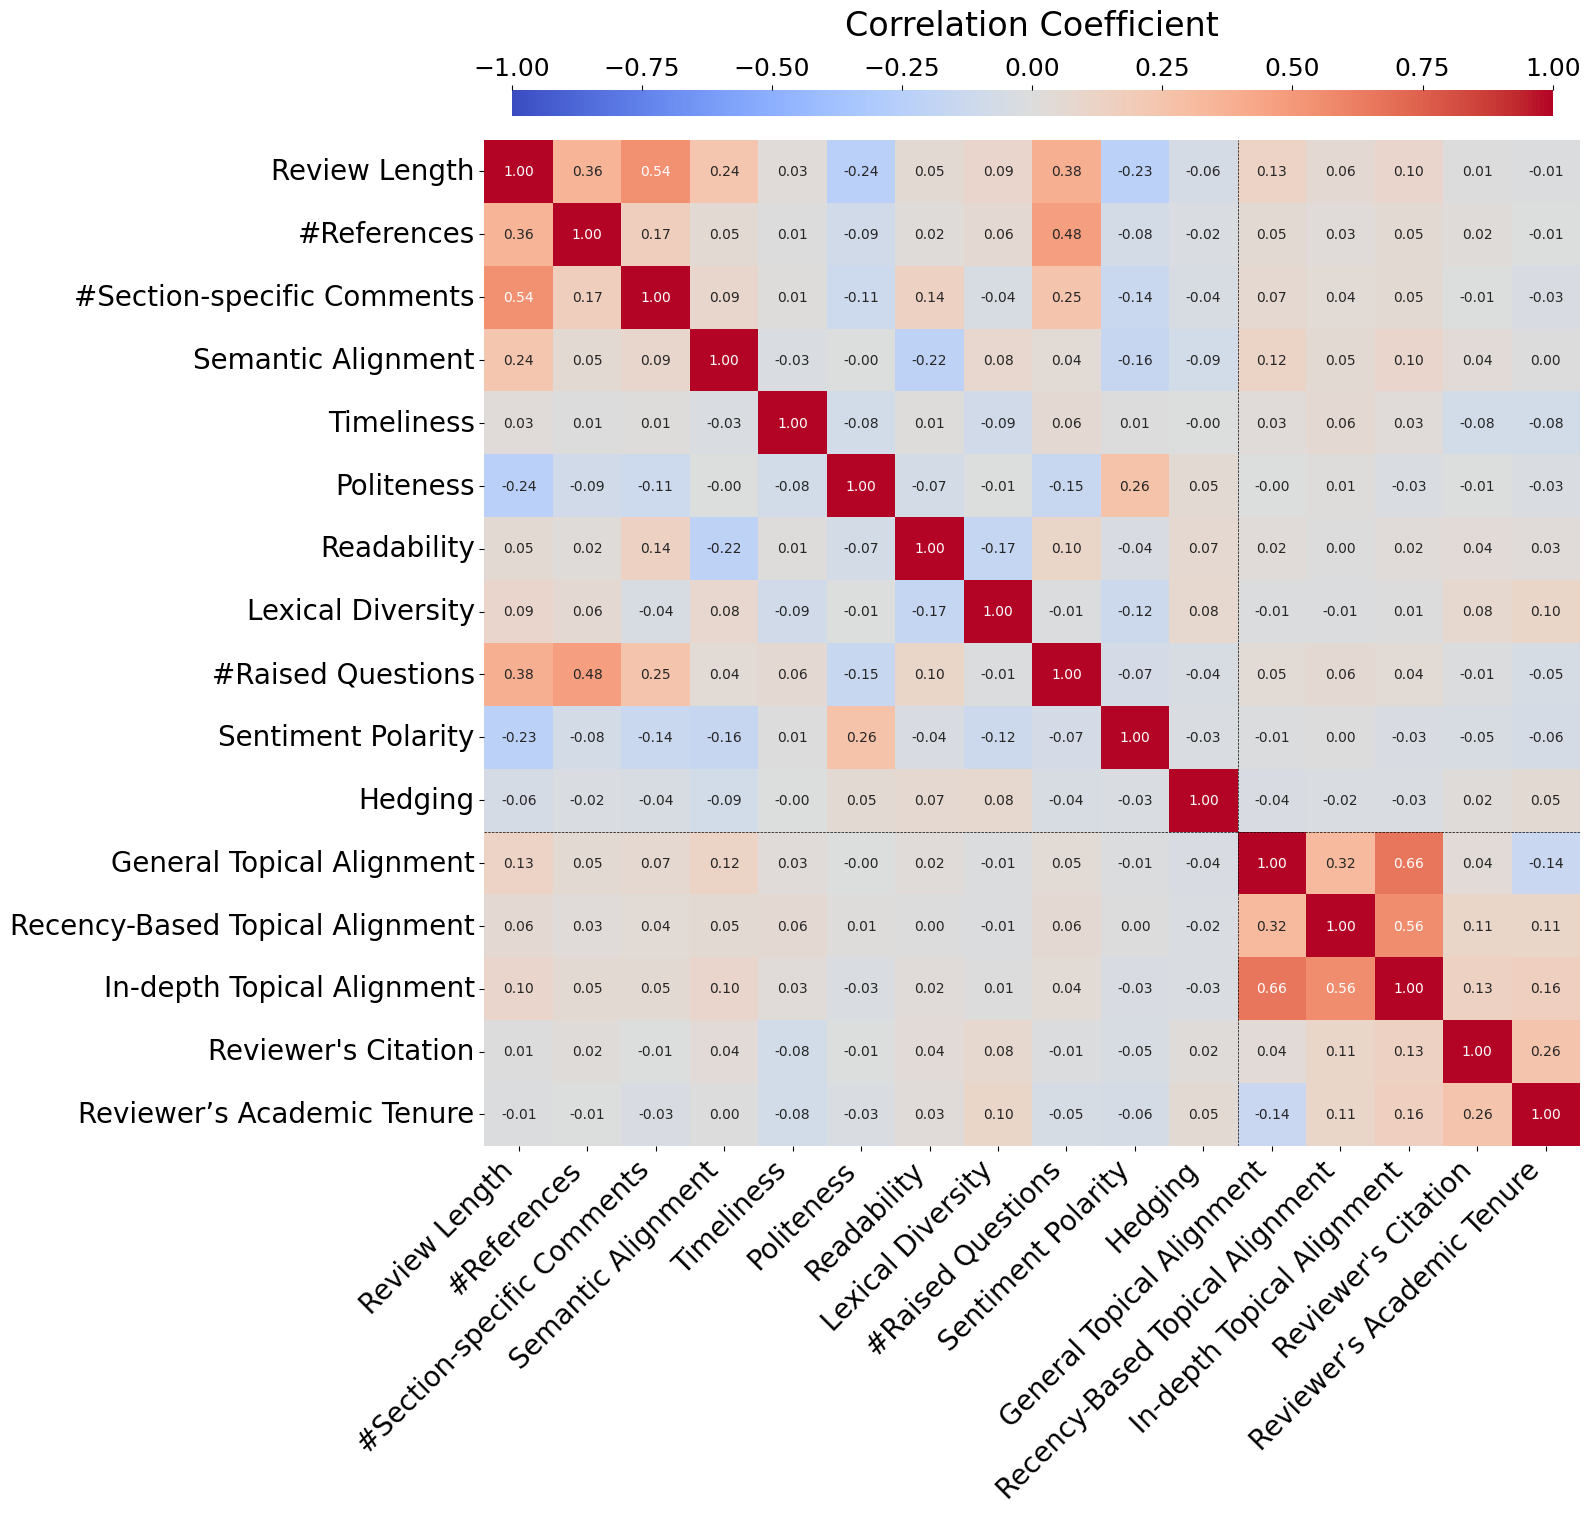

In [25]:
def plot_single_correlation_map(df, title):
    # same bottom/top grouping logic…
    bottom_group = [
        'General Topical Alignment',
        'Recency-Based Topical Alignment',
        'In-depth Topical Alignment',
        "Reviewer's Citation",
        "Reviewer’s Academic Tenure"
    ]
    top_group = [
        'Review Length', '#References', '#Section-specific Comments', 'Semantic Alignment',
        'Timeliness', 'Politeness', 'Readability', 'Lexical Diversity',
        '#Raised Questions', 'Sentiment Polarity', 'Hedging'
    ]

    def process_df(df):
        return df[top_group + bottom_group]

    # process only the first df
    df_processed = process_df(df.select_dtypes(include=['float64', 'int64']))
    corr = df_processed.corr()

    # make a single tall figure
    fig, ax = plt.subplots(
        1, 1,
        figsize=(16, 16),
        gridspec_kw={'hspace': 0.0}  # no extra vertical gap needed
    )

    # draw the heatmap
    sns.heatmap(
        corr,
        ax=ax,
        cmap='coolwarm',
        vmin=-1, vmax=1,
        center=0,
        annot=True,
        fmt=".2f",
        cbar=True,
        cbar_kws={
            'label': 'Correlation Coefficient',
            'orientation': 'horizontal',  # Key parameter
            'location': 'top',            # Position
            'pad': 0.02,                  # Distance from heatmap
            'shrink': 0.95,                # Size relative to heatmap
            'aspect': 40                   # Length vs thickness ratio
        },
        xticklabels=True,
        yticklabels=True,
        annot_kws={"size": 10}
    )

    ax.set_title(title, fontsize=20, pad=15)

    # add the separation line
    sep = len(corr.columns) - len(bottom_group)
    ax.axhline(sep, color='black', linewidth=0.5, linestyle='--')
    ax.axvline(sep, color='black', linewidth=0.5, linestyle='--')

    # Access colorbar and modify labels
    cbar = ax.collections[0].colorbar
    cbar.ax.xaxis.label.set_size(24)      # Changed from yaxis to xaxis
    cbar.ax.tick_params(axis='x', labelsize=18)  # Changed axis to 'x'
    cbar.ax.xaxis.labelpad = 15


    # Adjust layout to make space for top colorbar
    # plt.subplots_adjust(top=0.85)  # Increase top margin

    # tweak tick labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=20)
    plt.setp(ax.get_yticklabels(), rotation=0, fontsize=20)

    plt.tight_layout()
    plt.savefig(f'corr_{title}_qmetric.pdf', dpi=300, bbox_inches='tight')
    plt.show()

# Usage for only the F1000 map:
plot_single_correlation_map(df_f1000, '')


In [20]:
df_human_qmetric = pd.read_csv('/home/ali/Review_Quality_Benchmark/Qmetrics-vs-Human/human_llms_qmetrics.csv')
df_human_qmetric

# drop all the columns that start with 'Qwen', 'Llama', 'GPT', 'Phi'
df_human_qmetric = df_human_qmetric.loc[:, ~df_human_qmetric.columns.str.startswith(('Qwen', 'Llama', 'GPT', 'Phi'))]
# drop paper_id, reviewer, title, abstract, review_text
df_human_qmetric = df_human_qmetric.drop(columns=['paper_id', 'reviewer', 'title', 'abstract', 'review_text', 'venue'])
# rename the columns 
df_human_qmetric = df_human_qmetric.rename(columns={'length_words': 'Review Length', 'mattr': 'Lexical Diversity', 'question_count': '#Raised Questions', 'citation_count': '#References',
'sentiment_polarity': 'Sentiment Polarity', 'politeness_score': 'Politeness', 'flesch_reading_ease': 'Readability', 'similarity_score': 'Semantic Alignment',
'days_to_submit': 'Timeliness', 'hedging': 'Hedging'})
df_human_qmetric

CATEGORY_MAP = {
    'Human_Factuality': ['unfactual', 'partially factual', 'factual'],
    'Human_Politeness': ['impolite', 'neutral', 'polite'],
    'Human_Sentiment_Polarity': ['negative', 'neutral', 'positive'],
    'Human_Vagueness': ['none', 'low', 'moderate', 'high', 'extreme']
}

# change the values of columns in CATEGORY_MAP to numerical values
def map_categories(df, category_map):
    for category, values in category_map.items():
        df[category] = df[category].apply(lambda x: values.index(x) if x in values else None)
    return df

# Apply the mapping to the DataFrame
df_human_qmetric = map_categories(df_human_qmetric, CATEGORY_MAP)
# Convert columns to float
df_human_qmetric = df_human_qmetric.astype({
    'Human_Factuality': 'float',
    'Human_Politeness': 'float',
    'Human_Sentiment_Polarity': 'float',
    'Human_Vagueness': 'float'
})
df_human_qmetric.columns

Index(['Review Length', '#References', '#Raised Questions',
       'Lexical Diversity', 'Sentiment Polarity', 'Semantic Alignment',
       'Timeliness', 'Readability', 'Politeness', 'Hedging',
       'Human_Actionability', 'Human_Clarity_and_Readability',
       'Human_Comprehensiveness', 'Human_Constructiveness', 'Human_Factuality',
       'Human_Fairness', 'Human_Objectivity', 'Human_Overall_Quality',
       'Human_Politeness', 'Human_Relevance_Alignment',
       'Human_Sentiment_Polarity', 'Human_Usage_of_Technical_Terms',
       'Human_Vagueness'],
      dtype='object')

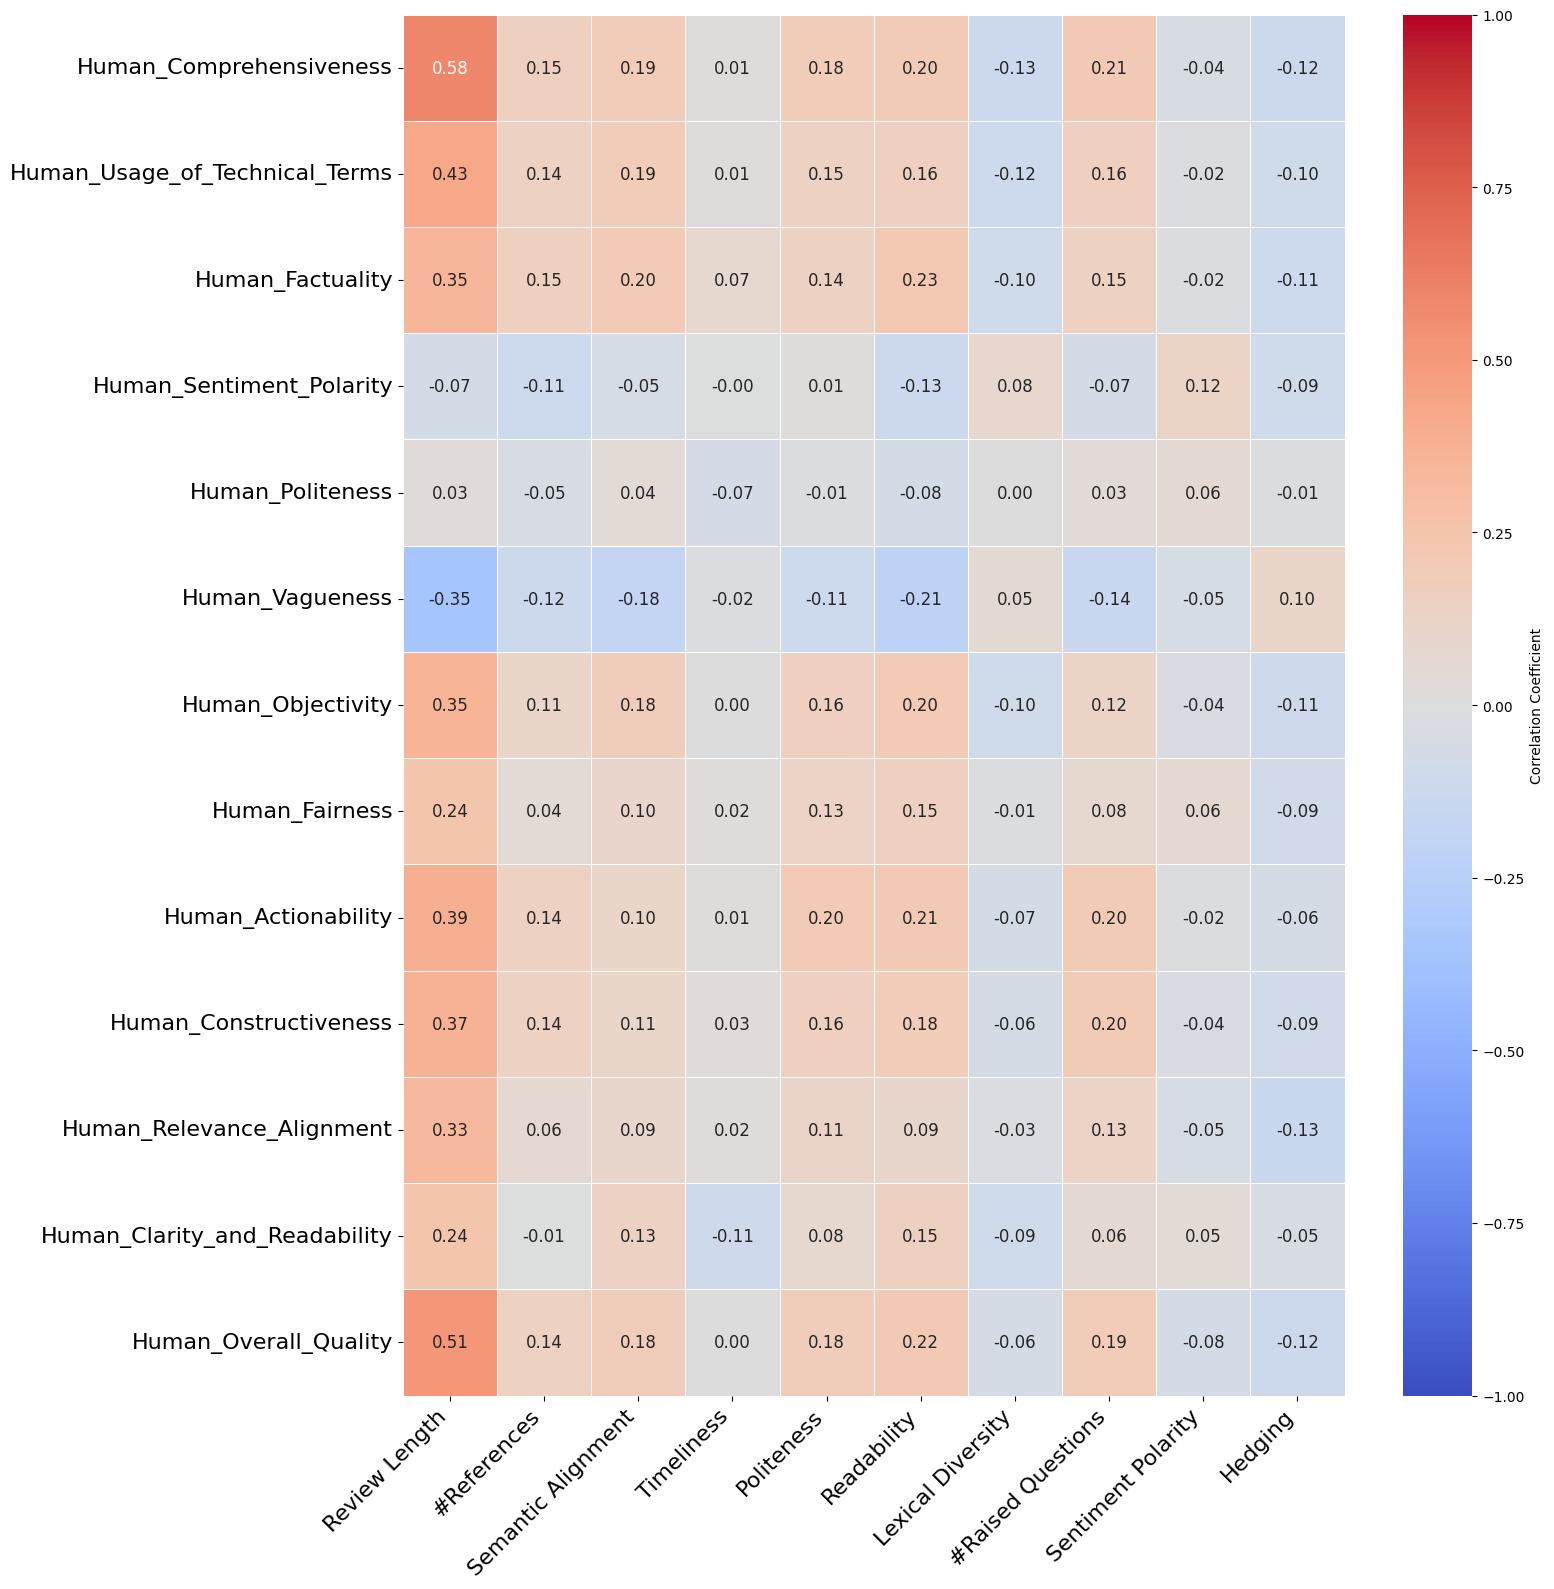

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_human_qmetric.copy()

# Separate columns into two groups
non_human_columns = [
        'Review Length', '#References', 'Semantic Alignment', 'Timeliness', 'Politeness', 
        'Readability', 'Lexical Diversity', '#Raised Questions', 'Sentiment Polarity', 'Hedging']

human_columns = ['Human_Comprehensiveness', 'Human_Usage_of_Technical_Terms', 'Human_Factuality', 'Human_Sentiment_Polarity',
                 'Human_Politeness', 'Human_Vagueness', 'Human_Objectivity', 'Human_Fairness', 'Human_Actionability', 'Human_Constructiveness',
                 'Human_Relevance_Alignment', 'Human_Clarity_and_Readability', 'Human_Overall_Quality']

# Create a subset DataFrame for correlation analysis
correlation_df = df[human_columns + non_human_columns]

# Calculate correlations
corr_matrix = correlation_df.corr()

# Slice the correlation matrix to show only Human vs Non-Human correlations
human_vs_rest = corr_matrix.loc[human_columns, non_human_columns]

# Plot the heatmap
plt.figure(figsize=(16, 16))
sns.heatmap(human_vs_rest, 
            annot=True, 
            cmap='coolwarm', 
            fmt=".2f", 
            vmin=-1, 
            vmax=1, 
            center=0,
            linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'},
            annot_kws={"size": 12})

# Formatting
plt.title('', pad=20, fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
# plt.xlabel('Quantifiable Metrics', fontsize=16)
# plt.ylabel('Human Evaluations', fontsize=16)

# # Access colorbar and modify labels
# cbar = ax.collections[0].colorbar
# cbar.ax.xaxis.label.set_size(18)      # Changed from yaxis to xaxis
# cbar.ax.tick_params(axis='x', labelsize=14)  # Changed axis to 'x'

# Adjust layout
plt.tight_layout()
plt.show()

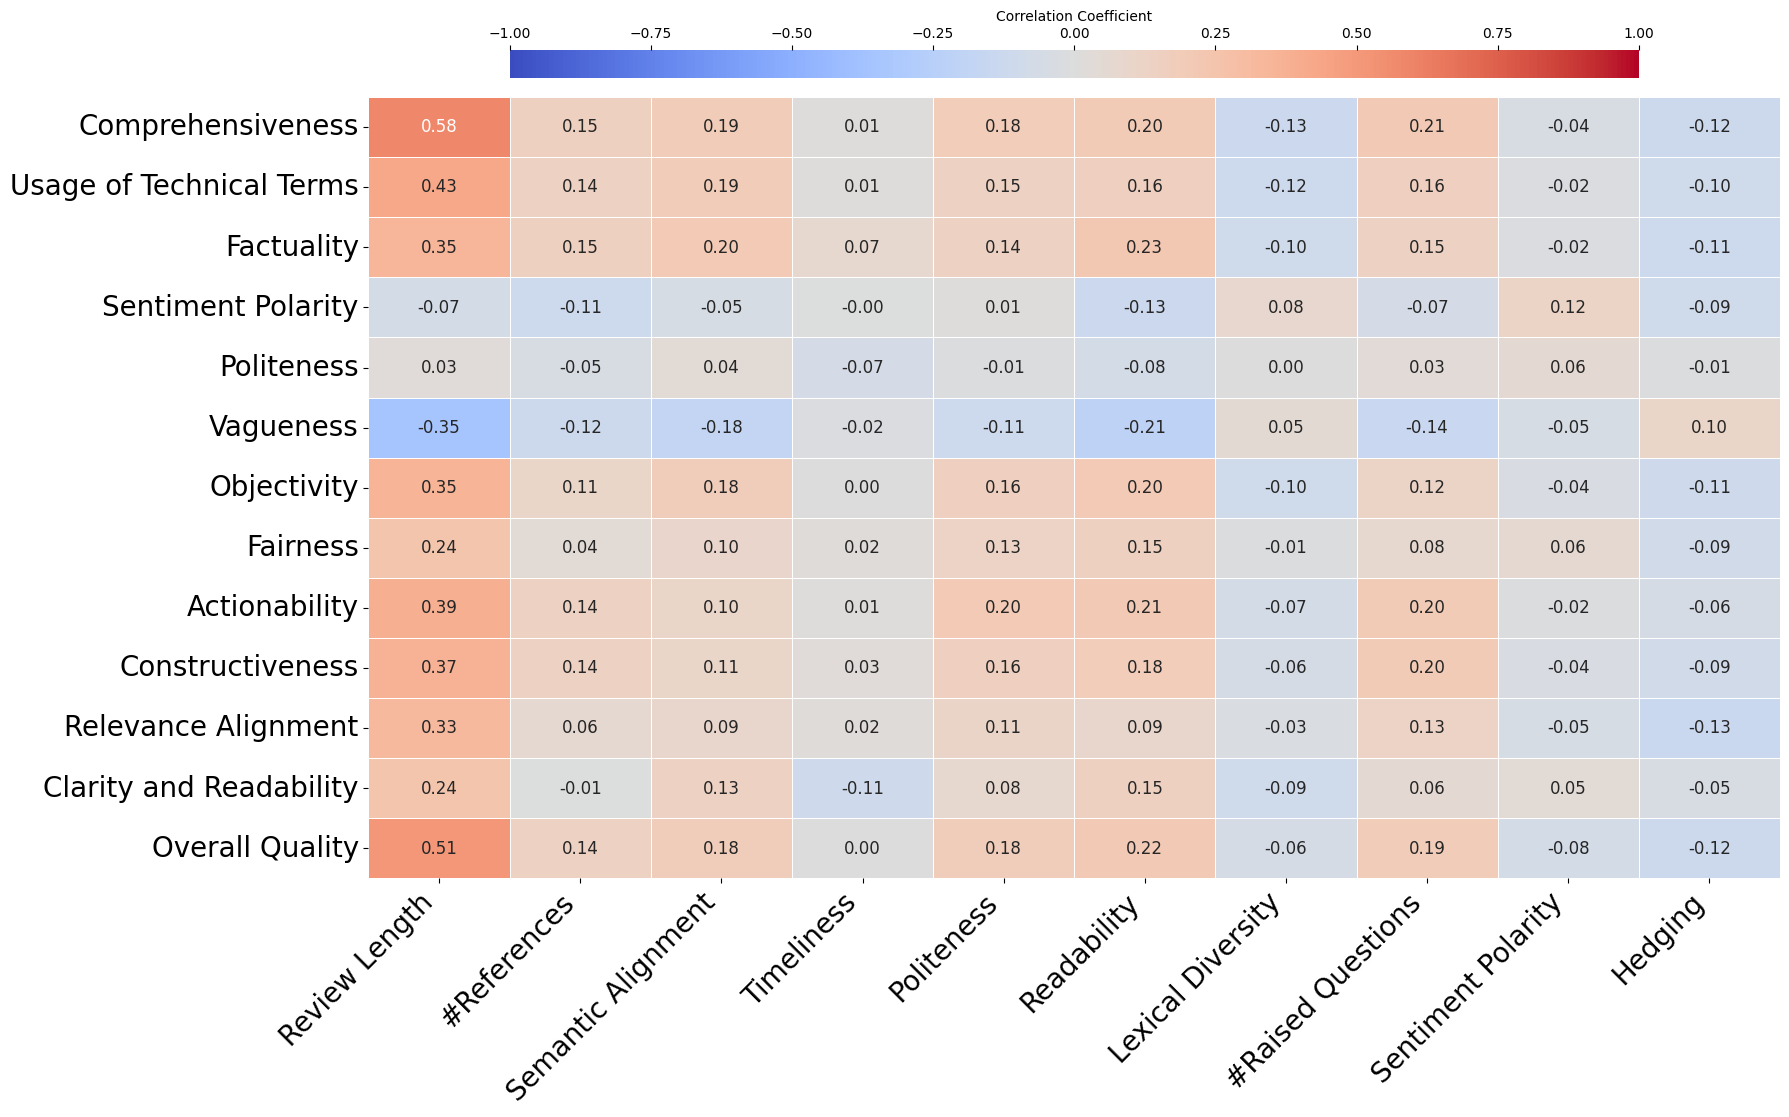

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = df_human_qmetric.copy()

# Original column names (keep unchanged)
non_human_columns = [
    'Review Length', '#References', 'Semantic Alignment', 'Timeliness', 'Politeness',
    'Readability', 'Lexical Diversity', '#Raised Questions', 'Sentiment Polarity', 'Hedging'
]

human_columns = [
    'Human_Comprehensiveness', 'Human_Usage_of_Technical_Terms', 'Human_Factuality',
    'Human_Sentiment_Polarity', 'Human_Politeness', 'Human_Vagueness', 'Human_Objectivity',
    'Human_Fairness', 'Human_Actionability', 'Human_Constructiveness',
    'Human_Relevance_Alignment', 'Human_Clarity_and_Readability', 'Human_Overall_Quality'
]

# Create display labels without "Human_" and with spaces instead of underscores
human_labels = [col.replace('Human_', '').replace('_', ' ') for col in human_columns]
non_human_labels = [col.replace('_', ' ') for col in non_human_columns]

# Create subset and calculate correlations
correlation_df = df[human_columns + non_human_columns]
corr_matrix = correlation_df.corr()
human_vs_rest = corr_matrix.loc[human_columns, non_human_columns]

# Plotting
plt.figure(figsize=(18, 12))
ax = sns.heatmap(
    human_vs_rest, 
    annot=True, 
    cmap='coolwarm', 
    fmt=".2f", 
    vmin=-1, 
    vmax=1, 
    center=0,
    linewidths=0.5,
    cbar_kws={
        'label': 'Correlation Coefficient',
        'orientation': 'horizontal',  # Key parameter
        'location': 'top',            # Position
        'pad': 0.02,                  # Distance from heatmap
        'shrink': 0.8,                # Size relative to heatmap
        'aspect': 40                   # Length vs thickness ratio
    },
    annot_kws={"size": 12}
)
cbar = ax.collections[0].colorbar
cbar.ax.yaxis.label.set_size(20)  # Colorbar title/label

# Customize labels using original column names but display cleaned labels
ax.set_yticklabels(human_labels, rotation=0, fontsize=18)
ax.set_xticklabels(
    [label.replace('_', ' ') for label in non_human_labels],  # Extra safety for underscores
    rotation=45, 
    ha='right', 
    fontsize=18
)

# Axis labels
plt.xlabel('', fontsize=18, labelpad=15)
plt.ylabel('', fontsize=18, labelpad=15)

# Adjust layout
plt.tight_layout()
plt.savefig('../Figs/corr_human_vs_qmetric.pdf', dpi=300, bbox_inches='tight')
plt.show()